In [51]:
import json
import glob
import os
import shutil
import re
import nltk
import string
import math
import csv
import matplotlib.pyplot as plt
import sys
from operator import itemgetter
from termcolor import colored, cprint
import random

In [ ]:
path = "D:\SEM 2\Python\Assignments\chintha_archana_spring2017\Assignment 2"
configfiles = glob.glob(r"C:\Users\chint\AppData\Roaming\nltk_data\corpora\gutenberg\*.txt")

In [91]:
colors = ("magenta", "yellow", "cyan")
def get_on_color():
    global colors
    return "on_" + colors[random.randint(0,len(colors)-1)]

In [76]:
import re
def getWords(text):
    return re.compile('[A-Za-z]+').findall(text)

In [77]:
def dataProcessing(data):
    totalWords = getWords(data)
    lowerWords = []
    for word in totalWords:
        lowerWords.append(word.lower())
    return lowerWords

In [78]:
def frequencyRankCalculation(totalWords):
    uniqueWords = {}
    for word in totalWords: # Loop all the words
            if word not in uniqueWords:
                uniqueWords[word] = 1   # if the word is not in the dictionary adding the word and setting a count
            else:
                uniqueWords[word] += 1  # incrementing the count if it's already presnt
    sortedFreq = sorted(uniqueWords.items(), key=itemgetter(1),reverse=True) 
    listOfWords = [list(elem) for elem in sortedFreq]
    for count,elem in enumerate(listOfWords,1):
        elem.append(count)
    return listOfWords
    

In [79]:
def zipfFormula(list1, totalNoWords):
    for element in list1: 
        probabilityOfR = element[1]/totalNoWords
        element.append(probabilityOfR)
        A = element[2]*element[3]
        element.append(A)
        rFreq = element[1]*element[2]
        element.append(rFreq)
        aMulN = element[4]*totalNoWords
        element.append(aMulN)
        logRank = math.log(element[2])
        element.append(logRank)
        logFreq = math.log(element[1])
        element.append(logFreq)     
    return list1

In [80]:
def top20PercentWords(listOfWords, lengthOfDictionary):
    twentyPercent = lambda x : round((20 * lengthOfDictionary)/100)
    total = twentyPercent(lengthOfDictionary)
    #print(total)
    sumOfFreq = 0
    length = len(listOfWords)
    for i in range(0,length):
        if listOfWords[i][2] <= total:
            sumOfFreq = sumOfFreq + listOfWords[i][1]
    return sumOfFreq

In [81]:
def gutenbergFile(configfiles):
    allFilesZipf = {}
    eightyTwentyRule = {}
    for file in configfiles:
        with open(file) as txt_file:
            fileName = os.path.basename(file)
            #print(fileName)
            data = txt_file.read()
            totalWords = dataProcessing(data)
            totalWordsLen = lambda x: len(x)
            lengthOfRawData = totalWordsLen(totalWords)
            listOfWords = frequencyRankCalculation(totalWords) 
            zipfLaw = zipfFormula(listOfWords, len(totalWords))
            totalSortedLen = lambda listOfWords: len(listOfWords)
            lengthOfDictionary = totalSortedLen(listOfWords)
            #print(lengthOfDictionary)
            sumOfFreq = top20PercentWords(listOfWords,lengthOfDictionary)
            eightyTwenty = (sumOfFreq/lengthOfRawData)*100
            if fileName not in eightyTwentyRule:
                eightyTwentyRule[fileName] = eightyTwenty
            if fileName not in allFilesZipf:
                    allFilesZipf[fileName] = zipfLaw
    return allFilesZipf

In [82]:
def eightyTwentyRule(configfiles):
    allFilesZipf = {}
    eightyTwentyRule = {}
    for file in configfiles:
        with open(file) as txt_file:
            fileName = os.path.basename(file)
            #print(fileName)
            data = txt_file.read()
            totalWords = dataProcessing(data)
            totalWordsLen = lambda x: len(x)
            lengthOfRawData = totalWordsLen(totalWords)
            listOfWords = frequencyRankCalculation(totalWords)
            totalSortedLen = lambda listOfWords: len(listOfWords)
            lengthOfDictionary = totalSortedLen(listOfWords)
            #print(lengthOfDictionary)
            sumOfFreq = top20PercentWords(listOfWords,lengthOfDictionary)
            eightyTwenty = (sumOfFreq/lengthOfRawData)*100
            if fileName not in eightyTwentyRule:
                eightyTwentyRule[fileName] = eightyTwenty
    return eightyTwentyRule

In [83]:
def graphWithMatplotlib(gutenberg, filename):
    x = []
    y = []
    a = []
    b = []
    imagesList = []
    #print("Zipf's Law holds true for the file : ", filename)
    for key,value in gutenberg.items():
        if key == filename:
            for each in value:
                a.append(each[2])
                b.append(each[1])
                x.append(each[7])
                y.append(each[8])   
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title("ZIPF'S LAW")
    plt.grid(True)
    plt.xlim( 0, 10000 )    # set the xlim to xmin, xmax
    ymin, ymax = plt.ylim()   # return the current xlim
    plt.ylim( 0, 4000 )    # set the xlim to xmin, xmax
    freqRank = plt.scatter(a,b,20,[1,0,1])
    imgPath1 = os.path.join(path + '\\'+ filename + 'fig1' + ".jpeg")
    plt.savefig(imgPath1)
    imagesList.append(imgPath1)
    excelPath = os.path.join(path + '\\' + 'gutenbergGraphs.xlsx')
    plt.show()
    plt.xlabel('log (Rank)')
    plt.ylabel('log (Frequency)')
    plt.title("ZIPF'S LAW")
    plt.grid(True)
    plt.xlim( 0, 9 )    # set the xlim to xmin, xmax
    ymin, ymax = plt.ylim()   # return the current xlim
    plt.ylim( 0, 9 )    # set the xlim to xmin, xmax

    logRankFrq = plt.scatter(x,y,20,[1 , 0, 0])
    imgPath2 = os.path.join(path + '\\'+ filename + 'fig2' + ".jpeg")
    plt.savefig(imgPath2)
    imagesList.append(imgPath2)
    plt.show()
    output(excelPath, filename , imagesList)
    csvPath = os.path.join(path + '\\' + 'zipflaw.csv')
    if os.path.exists(csvPath):
        os.remove(csvPath)
        csvFile(filename, gutenberg)
    else:
        csvFile(filename, gutenberg)
    eigthy20 = eightyTwentyRule(configfiles)
    rule =  eigthy20[filename]
    print(colored("Conclusion:\n", 'green'))
    if rule < 80.0:
        print(colored("Zipf's Law does not hold true for this file", 'green'),colored(filename, 'magenta'), colored("because,\n",'green'))
        print(colored("According to '80/20' rule, though the data is linearly distributed as displayed in above graph, the highest frequency words are very minimal in this file.\n", 'green'))
        print(colored("So the top '20%' of words holds only ", 'green'), colored(rule, 'red'),colored("of complete words in the file not '80%' or above\n", 'green'))
        print(colored("Therefore '80/20' rule fails for this file", 'green'))
    else:
        print(colored("Zipf's Law hold's true for this file ", 'green'), colored(filename, 'magenta'), colored("because,\n", 'green'))
        print(colored("According to '80/20' rule, the data is linearly distributed.\n", 'green'))
        print(colored("And the top '20%' of words holds", 'green'), colored(rule, 'blue'), colored("of complete words in the file which is above",'green'), colored("80%", 'blue'), '\n')
        print(colored("Therefore '80/20' rule perfectly proves for this file", 'green', get_on_color()))

In [84]:
import xlsxwriter

def output(filename, sheet, imagesList):
# Create a workbook and add a worksheet.
    workbook = xlsxwriter.Workbook(filename)
    worksheet = workbook.add_worksheet(sheet)
    
    header_format = workbook.add_format()
   
    
    header_format.set_font_name('Calibri')
    header_format.set_align('center')
    header_format.set_align('vcenter')
    header_format.set_border()
    header_format.set_bold()
    header_format.set_size(14)
    
    
    worksheet.set_column('A:A', 50)
     
    col1_Name =  "Zipf's Law graph against Rank and Frequency "
    col2_Name =  "Zipf's Law graph against log(Rank) and log(Frequency) "
    worksheet.write(0, 0, col1_Name, header_format)
    worksheet.write(0, 8, col2_Name, header_format)
    
# Start from the first cell.
    
    row = 1
    col = 0
# Iterate over the data and write it out row by row.
    for n in imagesList:
        worksheet.insert_image(row, col, n)
        col += 5
        
    workbook.close()

In [85]:
def csvFile(filename, gutenberg):
    with open(os.path.join(path + '\zipflaw.csv'), 'a') as outcsv:   
    #configure writer to write standard csv file
        writer = csv.writer(outcsv, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
        csv.field_size_limit(100)
        for key,value in gutenberg.items():
            if key == filename:
                writer.writerow(['The Word Rank Frequency for the file:',key])
                writer.writerow(['Word', 'Frequency', 'Rank'])
                for each in value:
                    writer.writerow([each[0], each[1], each[2]])

In [86]:
gutenberg = gutenbergFile(configfiles)

In [87]:
for key,value in gutenberg.items():
    print("r * freq", "=", "A * N")
    print("-------------------------------\n")
    print("File Name:", key, '\n')
    for each in value[0:5]:
        print(each[5], "=" ,each[6])
    print("\n")
    
    

r * freq = A * N
-------------------------------

File Name: shakespeare-macbeth.txt 

650 = 650.0
1092 = 1092.0
1152 = 1152.0
1392 = 1392.0
1690 = 1689.9999999999998


r * freq = A * N
-------------------------------

File Name: chesterton-ball.txt 

4981 = 4981.0
5334 = 5334.0
7665 = 7665.0
9052 = 9052.0
7900 = 7899.999999999999


r * freq = A * N
-------------------------------

File Name: melville-moby_dick.txt 

14431 = 14430.999999999998
13218 = 13218.0
19290 = 19290.0
18944 = 18944.0
23125 = 23125.0


r * freq = A * N
-------------------------------

File Name: milton-paradise.txt 

3395 = 3394.9999999999995
5936 = 5936.0
6684 = 6684.0
8200 = 8200.0
6830 = 6830.0


r * freq = A * N
-------------------------------

File Name: austen-emma.txt 

5242 = 5242.000000000001
10408 = 10408.0
14691 = 14691.000000000002
17172 = 17172.0
15960 = 15960.000000000002


r * freq = A * N
-------------------------------

File Name: chesterton-brown.txt 

4670 = 4670.0
4442 = 4442.0
6396 = 6396.0
8

bryant-stories.txt


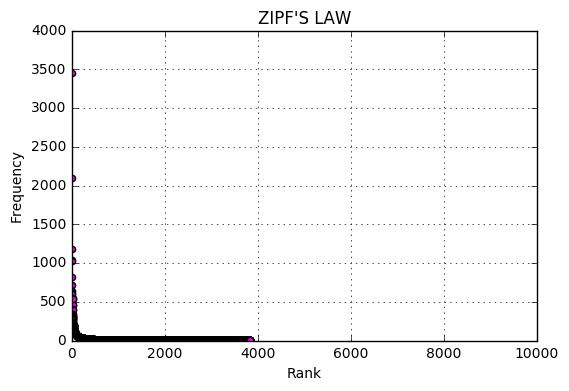

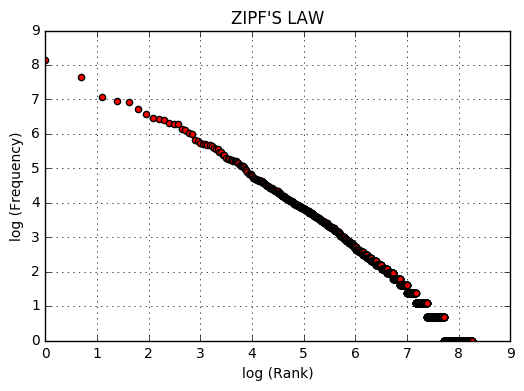

Conclusion:

Zipf's Law hold's true for this file  bryant-stories.txt because,

According to '80/20' rule, the data is linearly distributed.

And the top '20%' of words holds 86.0633445403345 of complete words in the file which is above 80% 

Therefore '80/20' rule perfectly proves for this file


In [92]:
inputFilename = ''
graphWithMatplotlib(gutenberg, input(inputFilename))
